# Setup and Preparation

In [ ]:
!nvidia-smi

Fri May 29 07:08:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Package Download and Installation

In [ ]:
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install unidecode
!pip install --upgrade nltk
!pip install --upgrade torchtext
!pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git
!pip install git+https://github.com/Maluuba/nlg-eval.git@master
!pip install OpenNMT-py

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144811 sha256=13e92c36b76767fbdfbeaee3ace3a245e52f311ea2c7812db80a78ff12403ab9
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-Levenshtein
     |████████████████████████████████| 245kB 6.6MB/s 
     |████████████████████████████████| 1.4MB 6.7MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434674 sha256=3e8cf220e4a9ee97fdd4eea997466cca0a44c424eb11784b1cf5d91ae2e5b479
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 71kB 3.8MB/s 
     |████████████████████████████████| 1.1MB 9.1MB/s 
  Fo

In [ ]:
!export NLGEVAL_DATA='/content/drive/My Drive/TA/.cache/nlgeval'
!nlg-eval --setup '/content/drive/My Drive/TA/.cache/nlgeval'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Installing to /content/drive/My Drive/TA/.cache/nlgeval
In case of incomplete downloads, delete the directory and run `nlg-eval --setup /content/drive/My Drive/TA/.cache/nlgeval' again.
glove2word2vec.py: 100% 1.00/1.00 [00:00<00:00, 578 chunks/s]
multi-bleu.perl: 100% 1.00/1.00 [00:00<00:00, 455 chunks/s]


In [ ]:
import sys
import string
import time
import math
import random
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
# nltk.download('wordnet')

# from gensim.models.fasttext import FastText

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

# from warmup_scheduler import GradualWarmupScheduler

from nlgeval import NLGEval

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BASE_PATH = '/content/drive/My Drive/TA/'

os.environ['PYTHONHASHSEED'] = '42'
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## ONMT Quickstart

In [ ]:
# !wget https://s3.amazonaws.com/opennmt-models/iwslt-brnn2.s131_acc_62.71_ppl_7.74_e20.pt
# !mkdir checkpoints
# !mv iwslt-brnn2.s131_acc_62.71_ppl_7.74_e20.pt checkpoints/.

# !wget https://raw.githubusercontent.com/pytorch/fairseq/e734b0fa58fcf02ded15c236289b3bd61c4cffdf/data/prepare-iwslt14.sh
# !sh prepare-iwslt14.sh
# !mv iwslt14.tokenized.de-en/ data/

In [ ]:
# !onmt_preprocess -train_src data/train.de -train_tgt data/train.en -valid_src data/valid.de -valid_tgt data/valid.en -save_data data/demo

In [ ]:
# !export CUDA_VISIBLE_DEVICES=0
# !echo $CUDA_VISIBLE_DEVICES
# !env

In [ ]:
# !onmt_train -data data/demo -save_model demo-model -world_size 1 -gpu_ranks 0

In [ ]:
# !onmt_translate -model '/content/drive/My Drive/TA/checkpoints/demo-model_step_100000.pt' -src data/test.de -output pred.txt -replace_unk -verbose

## Loads Indonesian FastText Model

In [ ]:
# model = FastText.load_fasttext_format(f'{BASE_PATH}models/word-embedding/cc.id.300.bin')

# EMBEDDING_SIZE = len(model.wv['a'])
# print(EMBEDDING_SIZE)
# print(len(model.wv.vocab))

In [ ]:
# i = 0
# for key, _ in model.wv.vocab.items():
#     print(key)
#     i += 1
#     if i > 10: break

In [ ]:
# print("algoritmatik" in model.wv.vocab)
# # print(model.wv.most_similar("algoritmatik"))

## Loading Data

In [ ]:
SQUAD_TRAIN_DATASET_PATH = f'{BASE_PATH}data/processed/train-v2.0-translated_fixed_enhanced.json'
SQUAD_TEST_DATASET_PATH = f'{BASE_PATH}data/processed/dev-v2.0-translated_fixed_enhanced.json'

df_squad = pd.read_json(SQUAD_TRAIN_DATASET_PATH)
df_squad_test = pd.read_json(SQUAD_TEST_DATASET_PATH)
print(df_squad.shape)
print(df_squad)
print(df_squad_test.shape)
print(df_squad_test)

(442, 2)
                                           title                                         paragraphs
0                                        Beyonce  [{'qas': [{'question': 'Kapan Beyonce mulai me...
1                                Frédéric Chopin  [{'qas': [{'question': 'Bagaimana kewarganegar...
2    Hubungan Tiongkok-Tibet selama dinasti Ming  [{'qas': [{'question': 'Siapakah Wang Jiawei d...
3                                           IPod  [{'qas': [{'question': 'Perusahaan mana yang m...
4         The Legend of Zelda: Twilight Princess  [{'qas': [{'question': 'Apa kategori game Lege...
..                                           ...                                                ...
437                                      Infeksi  [{'qas': [{'question': 'Dari sejumlah besar mi...
438                                      Berburu  [{'qas': [{'question': 'Apa praktik membunuh a...
439                                    Kathmandu  [{'qas': [{'question': 'Negara mana Kathm

In [ ]:
# # TAKEN_DATA_INDEX = 288

# # df_squad = df_squad[df_squad.index <= TAKEN_DATA_INDEX]
# print(df_squad.iloc[-1]['paragraphs'][-1].get('entities'))
# print(df_squad.iloc[-1]['paragraphs'][-1].get('postags'))

## Delete Unfound Answers from Dataset

In [ ]:
def delete_unfound_answers(df_squad):
    total_questions_before = 0
    total_questions = 0
    for taken_topic_idx in range(df_squad.shape[0]):
        for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
            i = 0
            qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
            while i < len(qas):
                total_questions_before += 1
                indonesian_answer = qas[i].get('indonesian_answers') or qas[i].get('indonesian_plausible_answers')
                if indonesian_answer[0]['answer_start'] < 0:
                    qas.pop(i)
                else:
                    i += 1
                    total_questions += 1
    print(f'Left: {total_questions}. Deleted: {total_questions_before-total_questions}')
print('Deleting unfound answer...')
print('Train')
delete_unfound_answers(df_squad)
print('Test')
delete_unfound_answers(df_squad_test)

Deleting unfound answer...
Train
Left: 120054. Deleted: 10265
Test
Left: 10885. Deleted: 988


# Prepare Tensors *(will delete tensors with unfound answers on the process)*

In [ ]:
# # print(model.wv.most_similar('adalah'))
# # print(model.wv['∈'])
# # print(model.wv.similarity('buddha', 'pisau'))
# # print(model.wv.similarity('buddha', 'tripitaka'))

# # print('frederic' in model.wv.vocab)
# # print(model.wv.most_similar('frederic'))
# # print('frédéric' in model.wv.vocab)
# # print(model.wv.most_similar('frédéric'))

# print(model.wv.most_similar('<unk'))
# print(model.wv.most_similar('<sos>'))
# print(model.wv.most_similar('<eos>'))
# print(model.wv.most_similar('<pad>'))
# print(model.wv.most_similar('</sos>'))
# print(model.wv.most_similar('</eos>'))

## TextDict Class

In [ ]:
class TextDict:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0

    def addWords(self, list_of_words):
        for word in list_of_words:
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

    def removeWords(self, list_of_words, restructureIndex=False):
        for word in list_of_words:
            self.removeWord(word)
        if restructureIndex:
            self._restructureIndex()

    def removeWord(self, word, restructureIndex=False):
        if word not in self.word2index:
            raise ValueError(f'{word} does not exist in the dictionary.')
        elif word in SPECIAL_TOKENS:
            return
        else:
            del self.index2word[self.word2index[word]]
            del self.word2index[word]
            del self.word2count[word]
            self.n_words -= 1
        if restructureIndex:
            self._restructureIndex()

    def _restructureIndex(self):
        self.index2word = {}
        i = 0
        for word in self.word2index:
            self.index2word[i] = word
            self.word2index[word] = i            
            i += 1
        assert i == self.n_words


def populate_text_dict(text_dict, df_squad, max_vocabulary):
    start_time = time.time()

    for taken_topic_idx in range(df_squad.shape[0]):
        for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
            context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['context']
            tokenized_context = tokenize(normalize_string(context))
            text_dict.addWords(tokenized_context)

            qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
            for qa in qas:
                indonesian_question = qa['question']
                tokenized_questions = tokenize(normalize_string(indonesian_question))
                text_dict.addWords(tokenized_questions)

    print('Original vocabulary:', text_dict.n_words)
    text_dict.word2count = {k: v for k, v in sorted(text_dict.word2count.items(), key=lambda item: item[1], reverse=True)}
    if text_dict.n_words > max_vocabulary:
        print('Least frequent words will be removed until n_vocab =', max_vocabulary)
        words_to_remove = list(text_dict.word2count.keys())[max_vocabulary:]
        text_dict.removeWords(words_to_remove, restructureIndex=True)

    end_time = time.time()
    print(f'Execution time: {end_time-start_time}')

## Context, NER, and POS Tags TextDict

In [ ]:
PAD_TOKEN = '<pad>'
EOS_TOKEN = '<eos>'
SOS_TOKEN = '<sos>'
OOV_TOKEN = '<unk>'
SPECIAL_TOKENS = [PAD_TOKEN, EOS_TOKEN, SOS_TOKEN, OOV_TOKEN]
PAD = 0
SOS = 2
EOS = 1
OOV = 3

text_dict = TextDict('context')
text_dict.addWords(SPECIAL_TOKENS)


NONE_NER_POS = '<none>'
NONE_NER_POS_TOKEN = 0

postags_textdict = TextDict('postags')
postags_textdict.addWords([NONE_NER_POS, 'NNO', 'NNP', 'PRN', 'PRR', 'PRI', 'PRK', 'ADJ', 'VBI', 'VBT', 'VBP', 'VBL', 'VBE', 'ADV', 'ADK', 'NEG', 'CCN', 'CSN', 'PPO', 'INT', 'KUA', 'NUM', 'ART', 'PAR', 'UNS', '$$$', 'SYM', 'PUN', 'TAME'])

ner_textdict = TextDict('entities')
ner_textdict.addWords([NONE_NER_POS, 'PER', 'NOR', 'FAC', 'ORG', 'GPE', 'LOC', 'PRO', 'EVT', 'WOA', 'LAW', 'LNG', 'DTE', 'TME', 'PCT', 'MON', 'QUA', 'ORD', 'CRD'])

## Preprocessor Functions

### Tokenizer

In [ ]:
import re
from unidecode import unidecode

# Complete punctuation from string.punctuation: !"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~

def unicode_to_ascii(s):
    return unidecode(s)

non_ascii_regex = re.compile(r"[^\x00-\x7F\u2013]")

def normalize_string(s, lower=False):
    s = unicode_to_ascii(s)
    if lower:
        s = s.lower()
    return s

punctuations = '!"#$%&\'()*+/;<=>@?[\\]^_`{|}~'
punctuations_regex = re.compile(r"([%s])" % punctuations)
real_separator_regex = re.compile(r"(([\.,:][^a-zA-Z0-9])|([\.,:]$))")
def tokenize(s):
    s = re.sub(punctuations_regex, r" \1 ", s)
    s = re.sub(real_separator_regex, r" \1", s)
    s = s.split()
    return s

text = '"Frédéric Chopin! adalah, (1907–1986) (1907-1986) anak-anak (children): gembala. Andi\'s sheep is an \'03 R&B player; 奉獻 km² Jīdū °5 вера ʰp". Totalnya 10.000 rupiah . ,'
# text = 'Untuk merekam ini, Beyoncé dilatih secara fonetis oleh produser rekaman Amerika Rudy Perez.'
# text = 'Beyoncé Giselle Knowles-Carter (/ biːˈjɒnseɪ / bee-YON-say) (lahir 4 September 1981) adalah penyanyi, penulis lagu, produser dan aktris rekaman Amerika. Dilahirkan dan dibesarkan di Houston, Texas, ia tampil di berbagai kompetisi menyanyi dan menari sebagai seorang anak, dan mulai terkenal pada akhir 1990-an sebagai penyanyi utama grup gadis R&B Destiny\'s Child. Dikelola oleh ayahnya, Mathew Knowles, kelompok ini menjadi salah satu kelompok gadis terlaris di dunia sepanjang masa. Hiatus mereka melihat rilis album debut Beyoncé, Dangerously in Love (2003), yang menetapkan dia sebagai artis solo di seluruh dunia, memperoleh lima Grammy Awards dan menampilkan Billboard Hot 100 nomor satu single "Crazy in Love" dan "Baby Boy" .'
tokenize(normalize_string(text))

['"',
 'Frederic',
 'Chopin',
 '!',
 'adalah',
 ',',
 '(',
 '1907-1986',
 ')',
 '(',
 '1907-1986',
 ')',
 'anak-anak',
 '(',
 'children',
 ')',
 ':',
 'gembala',
 '.',
 'Andi',
 "'",
 's',
 'sheep',
 'is',
 'an',
 "'",
 '03',
 'R',
 '&',
 'B',
 'player',
 ';',
 'Feng',
 'Xian',
 'km2',
 'Jidu',
 'deg5',
 'vera',
 'hp',
 '"',
 '.',
 'Totalnya',
 '10.000',
 'rupiah',
 '.',
 ',']

### Padding

In [ ]:
import math
def convert_value_to_range(value, min_value, max_value, grouping_range):
    assert value >= min_value and value <= max_value and min_value != max_value
    n_class = math.ceil((max_value-min_value+1) / grouping_range)
    val_start = min_value + (value//grouping_range) * grouping_range
    val_end = min(max_value, val_start + grouping_range - 1)
    return f'{val_start}-{val_end}'

convert_value_to_range(15, 1, 19, 5)

'16-19'

                  0
count  95098.000000
mean      24.345338
std       13.130766
min        1.000000
25%       15.000000
50%       22.000000
75%       31.000000
max      438.000000

                   0
count  120054.000000
mean        9.816141
std         3.256387
min         1.000000
25%         8.000000
50%         9.000000
75%        12.000000
max        58.000000

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
66
22


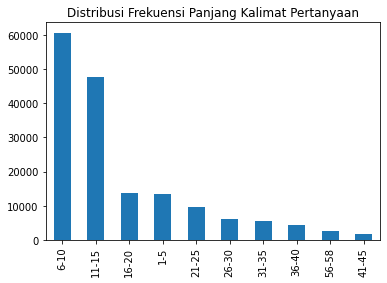

In [ ]:
TAKEN_QUANTILE = 0.99 #param {type:"number"}

def pad_tensor(tensor, value, length):
    tensor.extend([value for _ in range(length - len(tensor))])

def get_sentence_and_question_max_length(taken_quantile):
    sentence_lengths = []
    for paragraph in df_squad['paragraphs']:
        for qas in paragraph:
            context_sentences = nltk.tokenize.sent_tokenize(qas['context'])
            for sentence in context_sentences:
                sentence_lengths.append(len(tokenize(normalize_string(sentence))))
    df_sentence_lengths = pd.DataFrame(sentence_lengths)
    sentence_lengths_desc = df_sentence_lengths.describe()
    print(sentence_lengths_desc, end='\n\n')

    question_lengths = []
    for paragraph in df_squad['paragraphs']:
        for qas in paragraph:
            for qa in qas['qas']:
                question_lengths.append(len(tokenize(qa['question'])))
    df_question_lengths = pd.DataFrame(question_lengths)
    question_lengths_desc = df_question_lengths.describe()
    print(question_lengths_desc, end='\n\n')

    print(df_sentence_lengths[0].apply(convert_value_to_range,
                                       args=(
                                           df_sentence_lengths[0].min(),
                                           df_sentence_lengths[0].max(), 5
                                           )
                                       ).value_counts().plot(kind='bar', title='Distribusi Frekuensi Panjang Kalimat Bacaan'))
    print(df_question_lengths[0].apply(convert_value_to_range,
                                       args=(
                                           df_question_lengths[0].min(),
                                           df_question_lengths[0].max(), 5
                                           )
                                       ).value_counts().plot(kind='bar', title='Distribusi Frekuensi Panjang Kalimat Pertanyaan'))

    sentence_quantile = df_sentence_lengths.quantile(taken_quantile)[0].astype(int)
    question_quantile = df_question_lengths.quantile(taken_quantile)[0].astype(int)
    return sentence_quantile, question_quantile

SENTENCE_MAX_LENGTH, QUESTION_MAX_LENGTH = get_sentence_and_question_max_length(TAKEN_QUANTILE)
QUESTION_MAX_LENGTH += 2    # include SOS and EOS
print(SENTENCE_MAX_LENGTH)
print(QUESTION_MAX_LENGTH)

### Answer Preprocessor

In [ ]:
from fuzzywuzzy import fuzz

WORD_SIMILARITY_THRESHOLD = 80

def convert_charloc_to_wordloc(tokenized_context, tokenized_words, char_loc):
    if len(tokenized_words) == 0:
        return -2

    pointer_loc = 0
    i = 0
    j = 0
    while i < len(tokenized_context) and j < min(2, len(tokenized_words)):
        if char_loc-pointer_loc <= 5:
            if tokenized_context[i].isnumeric():
                similarity = fuzz.ratio(tokenized_context[i], tokenized_words[j])
            else:
                similarity = fuzz.partial_ratio(tokenized_context[i], tokenized_words[j])
            # print(f'{tokenized_context[i]} vs {tokenized_words[j]} = {similarity}')
            if similarity >= WORD_SIMILARITY_THRESHOLD:
                j += 1
        pointer_loc += len(tokenized_context[i]) + 1
        i += 1
    if j >= min(2, len(tokenized_words)):
        return i-j
    else:
        return -1

In [ ]:
def is_end_punctuations(token):
    return token in '.!?'

def get_sentence_location_from_answer_word_index(tokenized_context, answer_word_idx):
    start_idx = answer_word_idx-1
    end_idx = answer_word_idx
    while start_idx > -1 and not is_end_punctuations(tokenized_context[start_idx]):
        start_idx -= 1
    while end_idx < len(tokenized_context)-1 and not is_end_punctuations(tokenized_context[end_idx]):
        end_idx += 1
    return start_idx+1, end_idx

context = 'Aku adalah. Anak gembala! Selalu riang.serta gembira? Karena aku raj!in bek?erja tak pernah lengah ataupun lelah.. Lalala'
tokenized_context = tokenize(normalize_string(context))
answer_idx = 0
start_idx, end_idx = get_sentence_location_from_answer_word_index(tokenized_context, answer_idx)
print(' '.join(tokenized_context[start_idx:end_idx+1]))

Aku adalah .


### NER Preprocessor

In [ ]:
def create_ner_tensor(tokenized_context, entities, ner_textdict, return_in_tensor=True):
    ner_tensor = [0 if return_in_tensor else NONE_NER_POS for _ in range(len(tokenized_context))]

    if len(entities) == 0:
        return ner_tensor

    pointer_loc = 0
    i = 0
    j = 0
    k = 0
    entities_name = tokenize(entities[j]['name'])
    while i < len(tokenized_context) and entities_name != None:
        pointer_loc += len(tokenized_context[i]) + 1
        if entities[j]['begin_offset']-pointer_loc <= 0:
            similarity = fuzz.partial_ratio(tokenized_context[i], entities_name[k])
            # print(f'{tokenized_context[i]} vs {entities_name[k]} = {similarity}')
            if similarity >= WORD_SIMILARITY_THRESHOLD:
                ner_tensor[i] = ner_textdict.word2index[entities[j]['type']] if return_in_tensor else \
                                entities[j]['type']
                k += 1
                if k == len(entities_name):
                    j += 1
                    k = 0
                    entities_name = None if j == len(entities) else tokenize(entities[j]['name'])
            i += 1
    
    return ner_tensor

taken_topic_idx = 1
taken_content_idx = 0
context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('context')
print(context)
entities = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('entities')
print(entities)
ner_tensor = create_ner_tensor(tokenize(normalize_string(context)), entities, ner_textdict)
print(ner_tensor)
print([ner_textdict.index2word[ne] for ne in ner_tensor])
print(tokenize(normalize_string(context)))

Frédéric François Chopin (/ ˈʃoʊpæn /; pengucapan Prancis: [fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃]; 22 Februari atau 1 Maret 1810 - 17 Oktober 1849), kelahiran Fryderyk Franciszek Chopin, [bukan 1] adalah bahasa Polandia dan komposer Prancis (berdasarkan kewarganegaraan dan kelahiran ayah) dan seorang pianis virtuoso dari era Romantis, yang menulis terutama untuk piano solo. Dia memperoleh dan telah mempertahankan terkenal di seluruh dunia sebagai salah satu musisi terkemuka di zamannya, yang "jenius puitisnya didasarkan pada teknik profesional yang tak ada bandingannya dalam generasinya." Chopin lahir di wilayah yang pada waktu itu adalah Kadipaten Warsawa, dan tumbuh di Warsawa, yang setelah 1815 menjadi bagian dari Kongres Polandia. Sebagai anak ajaib, ia menyelesaikan pendidikan musiknya dan menyusun karya-karyanya sebelumnya di Warsawa sebelum meninggalkan Polandia pada usia 20 tahun, kurang dari sebulan sebelum pecahnya Pemberontakan November 1830.
[{'begin_offset': 0, 'length': 17, 'name':

### PosTags Preprocessor

In [ ]:
FULL_MATCH = 100

def flatten(list):
    new_list = []
    for list_ in list:
        new_list.extend(list_)
    return new_list

def calc_n_gram_similarity(n, token_1, postags, j):
    n_gram = ''
    if j+n < len(postags):
        for k in range(n):
            n_gram += postags[j+k][0]
        # print(f'{n}-gram: {token_1} vs {n_gram} = {fuzz.ratio(token_1, n_gram)}')
        return fuzz.ratio(token_1, n_gram)
    else:
        return 0

MAX_N_GRAM = 5
def create_postags_tensor(tokenized_context, postags_, postags_textdict, return_in_tensor=True):
    pos_tensor = [0 if return_in_tensor else NONE_NER_POS for _ in range(len(tokenized_context))]

    if len(postags_) == 0:
        return pos_tensor

    average_sim = []
    j = 0
    postags = flatten(postags_)
    for i in range(len(tokenized_context)):
        n = 1
        found = False
        iter_limit = MAX_N_GRAM - max(0, i + 5 - len(tokenized_context))
        prev_n_gram_similarity = 0
        while n <= iter_limit and not found:
            n_gram_similarity = calc_n_gram_similarity(n, tokenized_context[i], postags, j)
            if n_gram_similarity == 0:
                pos_tensor[i] = NONE_NER_POS_TOKEN if return_in_tensor else NONE_NER_POS
                found = True
            elif n_gram_similarity != FULL_MATCH and n < iter_limit:
                if n_gram_similarity > prev_n_gram_similarity:
                    prev_n_gram_similarity = n_gram_similarity
                elif n_gram_similarity <= prev_n_gram_similarity:
                    j -= 1
                    pos_tensor[i] = postags_textdict.word2index[postags[j-n+1][1]] if return_in_tensor else \
                                    postags[j-n+1][1]
                    # print(f'\t{tokenized_context[i]} {postags[j-n+1][1]}')
                    j += n
                    found = True
            elif n_gram_similarity >= WORD_SIMILARITY_THRESHOLD:
                pos_tensor[i] = postags_textdict.word2index[postags[j-n+1][1]] if return_in_tensor else \
                                postags[j-n+1][1]
                # print(f'\t{tokenized_context[i]} {postags[j-n+1][1]}')
                j += n
                found = True
            else:
                pos_tensor[i] = NONE_NER_POS_TOKEN if return_in_tensor else NONE_NER_POS
                found = True
            n += 1
        average_sim.append(n_gram_similarity if n_gram_similarity > prev_n_gram_similarity else prev_n_gram_similarity)
    # average_sim = sum(average_sim)/len(average_sim)
    # print(f'Average similarity: {average_sim:.2f}%')
    return pos_tensor

taken_topic_idx = 1
taken_content_idx = 0
context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('context')
print(context)
postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('postags')
print(postags)
postags_tensor = create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict)
print(postags_tensor)
print([postags_textdict.index2word[postag] for postag in postags_tensor])
print(tokenize(normalize_string(context)))

Frédéric François Chopin (/ ˈʃoʊpæn /; pengucapan Prancis: [fʁe.de.ʁik fʁɑ̃.swa ʃɔ.pɛ̃]; 22 Februari atau 1 Maret 1810 - 17 Oktober 1849), kelahiran Fryderyk Franciszek Chopin, [bukan 1] adalah bahasa Polandia dan komposer Prancis (berdasarkan kewarganegaraan dan kelahiran ayah) dan seorang pianis virtuoso dari era Romantis, yang menulis terutama untuk piano solo. Dia memperoleh dan telah mempertahankan terkenal di seluruh dunia sebagai salah satu musisi terkemuka di zamannya, yang "jenius puitisnya didasarkan pada teknik profesional yang tak ada bandingannya dalam generasinya." Chopin lahir di wilayah yang pada waktu itu adalah Kadipaten Warsawa, dan tumbuh di Warsawa, yang setelah 1815 menjadi bagian dari Kongres Polandia. Sebagai anak ajaib, ia menyelesaikan pendidikan musiknya dan menyusun karya-karyanya sebelumnya di Warsawa sebelum meninggalkan Polandia pada usia 20 tahun, kurang dari sebulan sebelum pecahnya Pemberontakan November 1830.
[[['Frederic', 'NNP'], ['Francois', 'NNP']

In [ ]:
# results = []
# for taken_topic_idx in range(df_squad.shape[0]):
#     for taken_content_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
#         context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('context')
#         # print(context)
#         postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_content_idx].get('postags')
#         # print(postags)
#         # print(create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict))
#         _, result = create_postags_tensor(tokenize(normalize_string(context)), postags, postags_textdict)
#         results.append(result)
#         if result < 95:
#             print(f'{taken_topic_idx}, {taken_content_idx}, {result}')

### Do Preprocess

#### v2.0

In [ ]:
# def do_preprocess(df_squad, text_dict, reject_non_ne:bool) -> (any, list, list, list):
#     input_tensors = []
#     is_answer_tensors = []
#     is_cased_tensors = []
#     ner_tensors = []
#     pos_tensors = []

#     target_tensors = []

#     deleted = 0

#     start_time = time.time()
#     for taken_topic_idx in range(df_squad.shape[0]):
#         for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
#             context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['context']
#             tokenized_context = tokenize(normalize_string(context))
#             count_tobe_removed_chars = len(re.findall(non_ascii_regex, unicode_to_ascii(context))) * 1.5  # With assumption every nonascii is followed by space

#             try:
#                 entities = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['entities']
#                 postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['postags']
#             except KeyError:
#                 print(f'Key Error, skipped ({taken_topic_idx}, {taken_content_idx})')
#                 i += 1
#                 continue
#             entities = create_ner_tensor(tokenized_context, entities, ner_textdict)
#             postags = create_postags_tensor(tokenized_context, postags, postags_textdict)

#             qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
#             i = 0
#             while i < len(qas):
#                 qa = qas[i]

#                 indonesian_answer = qa.get('indonesian_answers') or qa.get('indonesian_plausible_answers')
#                 # indonesian_answer = qa.get('indonesian_answers')
#                 # if indonesian_answer is None:
#                 #     print(f'Found impossible question, Skipped..')
#                 #     i += 1
#                 #     continue
#                 tokenized_answers = tokenize(normalize_string(indonesian_answer[0]['text']))
#                 answer_start = indonesian_answer[0]['answer_start'] - count_tobe_removed_chars
#                 answer_idx = convert_charloc_to_wordloc(tokenized_context, tokenized_answers, answer_start)
#                 if answer_idx < 0:
#                     print(f'Not found at topic_idx={taken_topic_idx}, taken_context_idx={taken_context_idx}, qas_idx={i}')
#                     deleted += 1
#                     qas.pop(i)
#                     continue

#                 sent_start_idx, sent_end_idx = get_sentence_location_from_answer_word_index(tokenized_context, answer_idx)
#                 tokenized_sentence = tokenized_context[sent_start_idx:sent_end_idx+1]
#                 answer_idx -= sent_start_idx
#                 sentence_tensor = [
#                     text_dict.word2index.get(word) if text_dict.word2index.get(word) \
#                     else OOV \
#                     for word in tokenized_sentence
#                 ]
#                 if sent_end_idx-sent_start_idx+1 > SENTENCE_MAX_LENGTH:
#                     # print(f'Sentence too long, skipped ({taken_topic_idx}, {taken_content_idx})')
#                     i += 1
#                     continue

#                 ner_tensor = [entities[i] for i in range(sent_start_idx, sent_end_idx+1)]
#                 pos_tensor = [postags[i] for i in range(sent_start_idx, sent_end_idx+1)]
#                 pad_tensor(sentence_tensor, PAD, SENTENCE_MAX_LENGTH)
#                 pad_tensor(ner_tensor, NONE_NER_POS_TOKEN, SENTENCE_MAX_LENGTH)
#                 pad_tensor(pos_tensor, NONE_NER_POS_TOKEN, SENTENCE_MAX_LENGTH)

#                 answer_idx_range = (answer_idx, answer_idx+len(tokenized_answers))
#                 # non_ne rejection
#                 if reject_non_ne and (torch.tensor(ner_tensor[answer_idx:answer_idx+len(tokenized_answers)])==NONE_NER_POS_TOKEN).all():
#                     # print(f'Answer is not a named entity, skipped ({taken_topic_idx}, {taken_content_idx})')
#                     i += 1
#                     continue

#                 is_answer_tensor = []
#                 is_cased_tensor = []
#                 for j in range(SENTENCE_MAX_LENGTH):
#                     is_answer_tensor.append(
#                         1 if j in range(answer_idx, answer_idx+len(tokenized_answers)) \
#                         else 0
#                     )
#                     is_cased_tensor.append(
#                         1 if j<len(tokenized_sentence) and any(c.isupper() for c in tokenized_sentence[j]) \
#                         else 0
#                     )

#                 indonesian_question = qa['question']
#                 tokenized_questions = tokenize(normalize_string(indonesian_question))
#                 if len(tokenized_questions) > QUESTION_MAX_LENGTH-2:
#                     # print(f'Question too long, skipped ({taken_topic_idx}, {taken_content_idx})')
#                     i += 1
#                     continue
#                 # if tokenized_questions[0].lower() != "kapan":
#                 #     print(f'Only accept "kapan" question. Skipping..')
#                 #     i += 1
#                 #     continue

#                 question_tensor = [
#                     text_dict.word2index.get(word) if text_dict.word2index.get(word) \
#                     else OOV \
#                     for word in tokenized_questions
#                 ]
#                 question_tensor.insert(0, SOS)
#                 question_tensor.append(EOS)
#                 pad_tensor(question_tensor, PAD, QUESTION_MAX_LENGTH)

#                 input_tensors.append(sentence_tensor)
#                 is_answer_tensors.append(is_answer_tensor)
#                 is_cased_tensors.append(is_cased_tensor)
#                 ner_tensors.append(ner_tensor)
#                 pos_tensors.append(pos_tensor)
#                 target_tensors.append(question_tensor)

#                 i += 1
#     end_time = time.time()

#     input_tensors = np.array(input_tensors).reshape((len(input_tensors), -1, 1))
#     is_answer_tensors = np.array(is_answer_tensors).reshape((len(is_answer_tensors), -1, 1))
#     is_cased_tensors = np.array(is_cased_tensors).reshape((len(is_cased_tensors), -1, 1))
#     ner_tensors = np.array(ner_tensors).reshape((len(ner_tensors), -1, 1))
#     pos_tensors = np.array(pos_tensors).reshape((len(pos_tensors), -1, 1))
#     feature_tensors = np.concatenate((is_answer_tensors, is_cased_tensors, ner_tensors, pos_tensors), axis=-1)
#     target_tensors = np.array(target_tensors).reshape((len(target_tensors), -1, 1))

#     print(f'Not found answers: {deleted}')
#     print(f'Execution time: {end_time-start_time}')
#     return df_squad, input_tensors, feature_tensors, target_tensors

#### v3.0

In [ ]:
def do_preprocess(df_squad) -> (list, list, list):
    inputs = []
    is_answers = []
    is_caseds = []
    ners = []
    poss = []

    targets = []

    deleted = 0

    start_time = time.time()
    for taken_topic_idx in range(df_squad.shape[0]):
        for taken_context_idx in range(len(df_squad.iloc[taken_topic_idx]['paragraphs'])):
            context = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['context']
            tokenized_context = tokenize(normalize_string(context))
            count_tobe_removed_chars = len(re.findall(non_ascii_regex, unicode_to_ascii(context))) * 1.5  # With assumption every nonascii is followed by space

            try:
                entities = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['entities']
                postags = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['postags']
            except KeyError:
                print(f'Key Error, skipped ({taken_topic_idx}, {taken_content_idx})')
                i += 1
                continue
            entities = create_ner_tensor(tokenized_context, entities, ner_textdict, return_in_tensor=False)
            postags = create_postags_tensor(tokenized_context, postags, postags_textdict, return_in_tensor=False)

            qas = df_squad.iloc[taken_topic_idx]['paragraphs'][taken_context_idx]['qas']
            i = 0
            while i < len(qas):
                qa = qas[i]

                indonesian_answer = qa.get('indonesian_answers') or qa.get('indonesian_plausible_answers')
                tokenized_answers = tokenize(normalize_string(indonesian_answer[0]['text']))
                answer_start = indonesian_answer[0]['answer_start'] - count_tobe_removed_chars
                answer_idx = convert_charloc_to_wordloc(tokenized_context, tokenized_answers, answer_start)
                if answer_idx < 0:
                    print(f'Not found at topic_idx={taken_topic_idx}, taken_context_idx={taken_context_idx}, qas_idx={i}')
                    deleted += 1
                    qas.pop(i)
                    continue

                sent_start_idx, sent_end_idx = get_sentence_location_from_answer_word_index(tokenized_context, answer_idx)
                tokenized_sentence = tokenized_context[sent_start_idx:sent_end_idx+1]
                if sent_end_idx-sent_start_idx+1 > SENTENCE_MAX_LENGTH:
                    # print(f'Sentence too long, skipped ({taken_topic_idx}, {taken_content_idx})')
                    i += 1
                    continue

                ner = [entities[i] for i in range(sent_start_idx, sent_end_idx+1)]
                pos = [postags[i] for i in range(sent_start_idx, sent_end_idx+1)]

                answer_idx_range = (answer_idx-sent_start_idx, answer_idx+len(tokenized_answers)-sent_start_idx)

                is_answer = []
                is_cased = []
                for j in range(len(tokenized_sentence)):
                    is_answer.append(
                        '1' if j in range(answer_idx_range[0], answer_idx_range[1]) \
                        else '0'
                    )
                    is_cased.append(
                        '1' if j<len(tokenized_sentence) and any(c.isupper() for c in tokenized_sentence[j]) \
                        else '0'
                    )

                indonesian_question = qa['question']
                tokenized_questions = tokenize(normalize_string(indonesian_question))
                if len(tokenized_questions) > QUESTION_MAX_LENGTH-2:
                    # print(f'Question too long, skipped ({taken_topic_idx}, {taken_content_idx})')
                    i += 1
                    continue

                i += 1
                inputs.append(tokenized_sentence)
                is_answers.append(is_answer)
                is_caseds.append(is_cased)
                ners.append(ner)
                poss.append(pos)
                targets.append(tokenized_questions)
    end_time = time.time()

    inputs = np.array(inputs)
    is_answers = np.expand_dims(is_answers, axis=-1)
    is_caseds = np.expand_dims(is_caseds, axis=1)
    ners = np.expand_dims(ners, axis=-1)
    poss = np.expand_dims(poss, axis=-1)
    features = np.concatenate((is_answers, is_caseds, ners, poss), axis=-1)
    # features = np.concatenate((is_answers, ners, poss), axis=1)
    targets = np.array(targets)

    print(f'Not found answers: {deleted}')
    print(f'Execution time: {end_time-start_time}')
    return inputs, features, targets

## Action!

In [ ]:
MAX_VOCABULARY = 2000000
populate_text_dict(text_dict, df_squad, MAX_VOCABULARY)

Original vocabulary: 97466
Execution time: 14.678905010223389


In [ ]:
print(text_dict.n_words)
print(list(enumerate(text_dict.word2count.items()))[55815])

97466
(55815, ('Buddhacarita', 1))


### Create Word Vector with Included OOV

In [ ]:
# oov_words = []

# for i, word in text_dict.index2word.items():
#     try:
#         if word not in model.wv.vocab:
#             oov_words.append(word)
#     except KeyError as e:
#         print(f'{type(e).__name__} exception: {e}.')
# len(oov_words)

# # with open(f'{BASE_PATH}models/word-embedding/fasttext_to_glove_id_300', 'w') as f_out:
# #     for key, value in pretrained_weight.items():
# #         f_out.write(key + ' ' + ' '.join(list(map(str, pretrained_weight[key].tolist()))) + '\n')

In [ ]:
# with open('oov_words.txt', 'w') as f_out:
#     f_out.write('\n'.join(oov_words))

In [ ]:
# !git clone https://github.com/facebookresearch/fastText.git
# %cd fastText
# !make
# %cd ..

# !cp '/content/drive/My Drive/TA/models/word-embedding/cc.id.300.bin' ./
# !fastText/fasttext print-word-vectors '/content/drive/My Drive/TA/models/word-embedding/cc.id.300.bin' < oov_words.txt
# !fastText/fasttext print-word-vectors cc.id.300.bin < oov_words.txt

In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz
# !gzip -d cc.id.300.vec.gz

In [ ]:
# !wc -l cc.id.300.vec
# !wc -l fasttext_squad_oov_id_300.txt

In [ ]:
# !sed -i 1d cc.id.300.vec
# !echo $'\n' >> cc.id.300.vec
# !cat fasttext_squad_oov_id_300.txt >> cc.id.300.vec

In [ ]:
# !sed -n '2000000,2000010 p' cc.id.300.vec
# !mv cc.id.300.vec '/content/drive/My Drive/TA/models/word-embedding/ft_to_gl_with_oov_id_300.vec'

In [ ]:
# !cp ft_to_gl_with_oov_id_300.vec '/content/drive/My Drive/TA/models/word-embedding/.'

### Prepare Input

In [ ]:
REJECT_NON_NE = False

In [ ]:
inputs, features, targets = do_preprocess(df_squad)

Not found at topic_idx=6, taken_context_idx=0, qas_idx=5
Not found at topic_idx=13, taken_context_idx=54, qas_idx=1
Not found at topic_idx=17, taken_context_idx=27, qas_idx=0
Not found at topic_idx=17, taken_context_idx=27, qas_idx=5
Not found at topic_idx=21, taken_context_idx=6, qas_idx=1
Not found at topic_idx=21, taken_context_idx=6, qas_idx=3
Not found at topic_idx=24, taken_context_idx=38, qas_idx=2
Not found at topic_idx=24, taken_context_idx=39, qas_idx=6
Not found at topic_idx=34, taken_context_idx=24, qas_idx=3
Not found at topic_idx=39, taken_context_idx=38, qas_idx=1
Not found at topic_idx=40, taken_context_idx=1, qas_idx=1
Not found at topic_idx=41, taken_context_idx=10, qas_idx=2
Not found at topic_idx=41, taken_context_idx=10, qas_idx=3
Not found at topic_idx=41, taken_context_idx=10, qas_idx=4
Not found at topic_idx=46, taken_context_idx=4, qas_idx=0
Not found at topic_idx=46, taken_context_idx=4, qas_idx=3
Not found at topic_idx=53, taken_context_idx=19, qas_idx=1
Not 

In [ ]:
inputs_test, features_test, targets_test = do_preprocess(df_squad_test)

Not found at topic_idx=8, taken_context_idx=15, qas_idx=4
Not found at topic_idx=12, taken_context_idx=19, qas_idx=5
Not found at topic_idx=29, taken_context_idx=11, qas_idx=1
Not found at topic_idx=29, taken_context_idx=26, qas_idx=1
Not found at topic_idx=31, taken_context_idx=25, qas_idx=0
Not found at topic_idx=31, taken_context_idx=25, qas_idx=4
Not found at topic_idx=32, taken_context_idx=8, qas_idx=1
Not found answers: 7
Execution time: 4.315260171890259


In [ ]:
print(inputs.shape)
print(features.shape)
print(targets.shape)
print(inputs_test.shape)
print(features_test.shape)
print(targets_test.shape)

(116421,)
(116421, 4)
(116421,)
(10536,)
(10536, 4)
(10536,)


In [ ]:
# def print_input_and_answer(input_tensors, feature_tensors, target_tensors, text_dict, n=3, randomized=True):
#     for j in range(n):
#         i = j if not randomized else random.randint(0, len(input_tensors))
#         print('Idx:', i)
#         input_tensor = input_tensors[i]
#         feature_tensor = feature_tensors[i]
#         target_tensor = target_tensors[i]
#         is_answer_tensor = feature_tensor[:,0]
#         input_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in input_tensor])
#         target_text = ' '.join([text_dict.index2word[word_idx.item()] for word_idx in target_tensor])
#         answer_text = ' '.join([text_dict.index2word[input_tensor[idx].item()] if is_answer_tensor[idx]==1 else '' for idx in range(len(is_answer_tensor))]).strip()
#         print('>', input_text)
#         print('=', target_text)
#         print('-', answer_text)
#         print('')

In [ ]:
# print('TRAIN DATASET:')
# print_input_and_answer(input_tensors, feature_tensors, target_tensors, text_dict)
# print()

# print('TEST DATASET :')
# print_input_and_answer(input_test_tensors, feature_test_tensors, target_test_tensors, text_dict)

In [ ]:
FEAT_SEP = u'￨'

def shuffle(*args):
    indices = np.arange(args[0].shape[0])
    np.random.shuffle(indices)
    result = []
    for i in range(len(args)):
        result.append(args[i][indices])
    return tuple(result)

def split_by_k(*args, k=0.9):
    assert 0 < k < 1, 'k must be between 0 and 1!'
    group_1 = []
    group_2 = []
    split_idx = int(k * len(args[0]))
    for i in range(len(args)):
        group_1.append(args[i][:split_idx])
        group_2.append(args[i][split_idx:])
    group_1.extend(group_2)
    return tuple(group_1)


def print_input_along_feature(input, feature):
    concated = np.concatenate((np.expand_dims(input, axis=0), np.array(feature.tolist())), axis=0).T
    result = []
    for concated_token in concated:
        result.append(FEAT_SEP.join(concated_token))
    return ' '.join(result)


def create_data_file(input_features, file_name, lower=False):
    i = 0
    for type_ in ['train', 'val', 'test']:
        save_dir = f'data/{type_}'
        os.system(f'mkdir -p {save_dir}')
        source_f_out = open(f'{save_dir}/{file_name}_source.txt', 'w')
        target_f_out = open(f'{save_dir}/{file_name}_target.txt', 'w')
        src_tgt_pairs = input_features[i]
        for j in range(len(src_tgt_pairs[0])):
            source_line = print_input_along_feature(src_tgt_pairs[0][j], src_tgt_pairs[1][j]) + '\n'
            target_line = ' '.join(src_tgt_pairs[2][j]) + '\n'
            if lower:
                source_line = source_line.lower()
                target_line = target_line.lower()
            source_f_out.write(source_line)
            target_f_out.write(target_line)
        source_f_out.close()
        target_f_out.close()
        i += 1

In [ ]:
inputs, features, targets = shuffle(inputs, features, targets)
inputs, features, targets, inputs_val, features_val, targets_val, = split_by_k(inputs, features, targets, k=0.8)

print(inputs.shape)
print(features.shape)
print(targets_val.shape)

create_data_file([(inputs, features, targets), (inputs_val, features_val, targets_val), (inputs_test, features_test, targets_test)], file_name='squad_id', lower=False)


# print('Preparing train tensors')
# input_tensors, feature_tensors, target_tensors = convert_to_torch(input_tensors, feature_tensors, target_tensors)
# print('Input size:', input_tensors.size())
# print('Features size:', feature_tensors.size())
# print('Target size:', target_tensors.size())
# print()

# print('Preparing val tensors')
# input_val_tensors, feature_val_tensors, target_val_tensors = convert_to_torch(input_val_tensors, feature_val_tensors, target_val_tensors)
# print('Input size:', input_val_tensors.size())
# print('Features size:', feature_val_tensors.size())
# print('Target size:', target_val_tensors.size())
# print()

# print('Preparing test tensors')
# input_test_tensors, feature_test_tensors, target_test_tensors = convert_to_torch(input_test_tensors, feature_test_tensors, target_test_tensors)
# print('Input size:', input_test_tensors.size())
# print('Features size:', feature_test_tensors.size())
# print('Target size:', target_test_tensors.size())

(93136,)
(93136, 4)
(23285,)


In [ ]:
print('Train data')
!wc -l data/train/squad_id_source.txt
print()
!head -5 data/train/squad_id_source.txt
print()
!head -5 data/train/squad_id_target.txt
print()

print('Test data')
!wc -l data/test/squad_id_source.txt
print()
!head -5 data/test/squad_id_source.txt
print()
!head -5 data/test/squad_id_target.txt

Train data
93136 data/train/squad_id_source.txt

Arsitektur￨0￨1￨<none>￨NNO desain￨0￨0￨<none>￨NNO USB￨0￨1￨<none>￨NNO asimetris￨0￨0￨<none>￨ADJ dalam￨0￨0￨<none>￨PPO topologinya￨1￨0￨<none>￨PPO ,￨0￨0￨<none>￨PUN terdiri￨0￨0￨<none>￨VBP dari￨0￨0￨<none>￨PPO host￨0￨0￨<none>￨NNO ,￨0￨0￨<none>￨PUN banyak￨0￨0￨<none>￨KUA port￨0￨0￨<none>￨NNO USB￨0￨1￨<none>￨NNO hilir￨0￨0￨<none>￨NNO ,￨0￨0￨<none>￨PUN dan￨0￨0￨<none>￨CCN beberapa￨0￨0￨<none>￨KUA perangkat￨0￨0￨<none>￨NNO periferal￨0￨0￨<none>￨NNO yang￨0￨0￨<none>￨PRR terhubung￨0￨0￨<none>￨VBP dalam￨0￨0￨<none>￨PPO topologi￨0￨0￨<none>￨NNO bintang￨0￨0￨<none>￨NNO bertingkat￨0￨0￨<none>￨VBI .￨0￨0￨<none>￨PUN
"￨0￨0￨<none>￨PUN Dia￨0￨1￨<none>￨PRN mengklaim￨0￨0￨<none>￨VBT bahwa￨0￨0￨<none>￨CSN jika￨0￨0￨<none>￨CSN mereka￨0￨0￨<none>￨PRN menghapus￨0￨0￨<none>￨VBT nama￨0￨0￨<none>￨NNO Calhoun￨0￨1￨<none>￨NNP ,￨0￨0￨<none>￨PUN itu￨1￨0￨<none>￨ART akan￨1￨0￨<none>￨TAME "￨1￨0￨<none>￨PUN mengaburkan￨1￨0￨<none>￨VBT "￨1￨0￨<none>￨PUN "￨1￨0￨<none>￨PUN warisan￨1￨0￨<none>￨NNO "￨1￨0￨<none>￨PUN

In [ ]:
# # Count rows which contain non-zero element
# print('Train:', np.unique(feature_tensors.cpu().numpy().nonzero()[0]).shape[0])
# print('Val:', np.unique(feature_val_tensors.cpu().numpy().nonzero()[0]).shape[0])
# print('Test:', np.unique(feature_test_tensors.cpu().numpy().nonzero()[0]).shape[0])

## Create Weights Matrix Embedding using FastText

In [ ]:
# pretrained_weight = np.zeros((len(text_dict.index2word), EMBEDDING_SIZE))

# def convert_word_to_word_embedding(word, model):
#     try:
#         word_embedding = model.wv[word]
#     except KeyError as e:
#         print(f'{type(e).__name__} exception: {e}.')
#         word_embedding = model.wv[OOV_TOKEN]
#     return word_embedding

# for i, word in text_dict.index2word.items():
#     pretrained_weight[i] = convert_word_to_word_embedding(word, model)
# print(f'All unknown words will be replaced with {OOV_TOKEN}')

# pretrained_weight = torch.from_numpy(pretrained_weight).float()
# print(f'Weights matrix size: {pretrained_weight.size()}')
# print(f'Total unique words count: {text_dict.n_words}')

In [ ]:
# pretrained_weight.dtype

In [ ]:
import gc
gc.collect()

0

## ONMT Seq2seq

In [ ]:
!onmt_preprocess -train_src data/train/squad_id_source.txt -train_tgt data/train/squad_id_target.txt \
    -valid_src data/val/squad_id_source.txt -valid_tgt data/val/squad_id_target.txt \
    -dynamic_dict \
    -save_data data/squad_id \
    -overwrite \
    -src_vocab_size 60000 \
    -tgt_vocab_size 60000 \
    -src_seq_length 60 \
    -tgt_seq_length 22

[2020-05-29 07:14:23,374 INFO] Extracting features...
[2020-05-29 07:14:23,375 INFO]  * number of source features: 4.
[2020-05-29 07:14:23,375 INFO]  * number of target features: 0.
[2020-05-29 07:14:23,375 INFO] Building `Fields` object...
[2020-05-29 07:14:23,375 INFO] Building & saving training data...
[2020-05-29 07:14:23,927 INFO] Building shard 0.
[2020-05-29 07:14:51,358 INFO]  * saving 0th train data shard to data/squad_id.train.0.pt.
[2020-05-29 07:15:20,583 INFO]  * tgt vocab size: 38390.
[2020-05-29 07:15:20,685 INFO]  * src vocab size: 60002.
[2020-05-29 07:15:20,685 INFO]  * src_feat_0 vocab size: 4.
[2020-05-29 07:15:20,685 INFO]  * src_feat_1 vocab size: 4.
[2020-05-29 07:15:20,685 INFO]  * src_feat_2 vocab size: 21.
[2020-05-29 07:15:20,685 INFO]  * src_feat_3 vocab size: 27.
[2020-05-29 07:15:21,016 INFO] Building & saving validation data...
[2020-05-29 07:15:21,368 INFO] Building shard 0.
[2020-05-29 07:15:26,988 INFO]  * saving 0th valid data shard to data/squad_id.v

In [ ]:
# !cp '/content/drive/My Drive/TA/models/word-embedding/ft_to_gl_with_oov_id_300.vec' ./
# # !sed -n '2000000,2000500 p' ft_to_gl_with_oov_id_300.vec
# # !echo $'1\n2\n3\n4\n5' > meow.txt
# !sed -i '2000001,2005400d' ft_to_gl_with_oov_id_300.vec

In [ ]:
!git clone https://github.com/OpenNMT/OpenNMT-py.git

%cd OpenNMT-py
!./tools/embeddings_to_torch.py -emb_file_both '../ft_to_gl_id_300.vec' \
    -dict_file '../data/squad_id.vocab.pt' \
    -output_file '../data/embeddings'
%cd ..

Cloning into 'OpenNMT-py'...
remote: Enumerating objects: 15937, done.
remote: Total 15937 (delta 0), reused 0 (delta 0), pack-reused 15937
Receiving objects: 100% (15937/15937), 146.71 MiB | 32.32 MiB/s, done.
Resolving deltas: 100% (11514/11514), done.
/content/OpenNMT-py
[2020-05-29 07:21:15,578 INFO] From: ../data/squad_id.vocab.pt
[2020-05-29 07:21:15,578 INFO] 	* source vocab: 60002 words
[2020-05-29 07:21:15,578 INFO] 	* target vocab: 38390 words
[2020-05-29 07:21:15,598 INFO] Reading encoder and decoder embeddings from ../ft_to_gl_with_oov_id_300.vec
[2020-05-29 07:21:51,756 INFO] 	Found 2000000 total vectors in file
[2020-05-29 07:21:51,757 INFO] After filtering to vectors in vocab:
[2020-05-29 07:21:51,776 INFO] 	* enc: 52359 match, 7643 missing, (87.26%)
[2020-05-29 07:21:51,789 INFO] 	* dec: 34371 match, 4019 missing, (89.53%)
[2020-05-29 07:21:51,790 INFO] 
Saving embedding as:
	* enc: ../data/embeddings.enc.pt
	* dec: ../data/embeddings.dec.pt
[2020-05-29 07:21:53,643 INF

In [ ]:
!onmt_train -data data/squad_id -save_model output/lstm_007 \
    -world_size 1 -gpu_ranks 0 \
    -save_checkpoint_steps 7195 \
    -train_from '/content/drive/My Drive/TA/checkpoints/lstm_007_step_29120.pt' \
    -word_vec_size 300 \
    -pre_word_vecs_enc "data/embeddings.enc.pt" \
    -pre_word_vecs_dec "data/embeddings.dec.pt" \
    -fix_word_vecs_enc \
    -fix_word_vecs_dec \
    -keep_checkpoint 5 \
    -learning_rate 1 \
    -learning_rate_decay 0.5 \
    -start_decay_steps 14390 \
    -encoder_type brnn \
    -layers 2 \
    -global_attention general \
    -rnn_size 600 \
    -copy_attn \
    -copy_attn_force \
    -coverage_attn \
    -train_steps 35975 \
    -valid_steps 2878 \
    -batch_size 64 \
    -dropout 0.3

# !onmt_train -data data/squad_id -save_model output/transformer_003 \
#     -world_size 1 -gpu_ranks 0 \
#     -train_from "/content/drive/My Drive/TA/checkpoints/transformer_003_step_100000.pt" \
#     -pre_word_vecs_enc "data/embeddings.enc.pt" \
#     -pre_word_vecs_dec "data/embeddings.dec.pt" \
#     -fix_word_vecs_enc \
#     -fix_word_vecs_dec \
#     -feat_merge mlp \
#     -keep_checkpoint 20 \
#     -layers 2 -rnn_size 300 -word_vec_size 300 -transformer_ff 256 -heads 2 \
#     -encoder_type transformer -decoder_type transformer -position_encoding \
#     -train_steps 200000  -max_generator_batches 2 -dropout 0.1 \
#     -batch_size 128 -batch_type tokens -normalization tokens  -accum_count 2 \
#     -optim adam -adam_beta2 0.998 -decay_method noam -warmup_steps 4000 -learning_rate 2 \
#     -max_grad_norm 0 -param_init 0  -param_init_glorot \
#     -label_smoothing 0.1 -valid_steps 1200 -save_checkpoint_steps 3000 \
#     -copy_attn \
#     -copy_attn_force \
#     -coverage_attn

[2020-05-29 07:22:07,950 INFO] Loading checkpoint from /content/drive/My Drive/TA/checkpoints/lstm_007_step_29120.pt
[2020-05-29 07:22:08,397 INFO] Loading vocab from checkpoint at /content/drive/My Drive/TA/checkpoints/lstm_007_step_29120.pt.
[2020-05-29 07:22:08,397 INFO]  * src vocab size = 60002
[2020-05-29 07:22:08,397 INFO]  * src_feat_0 vocab size = 4
[2020-05-29 07:22:08,397 INFO]  * src_feat_1 vocab size = 21
[2020-05-29 07:22:08,397 INFO]  * src_feat_2 vocab size = 27
[2020-05-29 07:22:08,397 INFO]  * tgt vocab size = 30004
[2020-05-29 07:22:08,398 INFO] Building model...
[2020-05-29 07:22:18,277 INFO] NMTModel(
  (encoder): RNNEncoder(
    (embeddings): Embeddings(
      (make_embedding): Sequential(
        (emb_luts): Elementwise(
          (0): Embedding(60002, 300, padding_idx=1)
          (1): Embedding(4, 2, padding_idx=1)
          (2): Embedding(21, 8, padding_idx=1)
          (3): Embedding(27, 10, padding_idx=1)
        )
      )
    )
    (rnn): LSTM(320, 300, num

In [ ]:
!cp output/lstm_007_step_35975.pt '/content/drive/My Drive/TA/checkpoints/'

In [ ]:
!onmt_translate -model '/content/drive/My Drive/TA/checkpoints/lstm_007_step_35975.pt' \
    -src data/test/squad_id_source.txt -output output/pred.txt -replace_unk -verbose \
    -beam_size 7 \
    -max_length 22

Streaming output truncated to the last 5000 lines.

SENT 9288: ['Hampir', 'semua', 'koloni', 'Perancis', 'memperoleh', 'kemerdekaan', 'pada', 'tahun', '1960', ',', 'tetapi', 'Prancis', 'tetap', 'memiliki', 'pengaruh', 'finansial', 'dan', 'diplomatik', 'yang', 'besar', '.']
PRED 9288: Kapan semua koloni Perancis memperoleh kemerdekaan ?
PRED SCORE: -4.3175

SENT 9289: ['Namun', 'setelah', '1945', 'gerakan', 'anti-kolonial', 'mulai', 'menantang', 'Kekaisaran', '.']
PRED 9289: Siapa yang mulai menantang Kekaisaran Kekaisaran ?
PRED SCORE: -6.3092

SENT 9290: ['Prancis', 'bertempur', 'dan', 'kalah', 'perang', 'pahit', 'di', 'Vietnam', 'pada', '1950-an', '.']
PRED 9290: Di mana Prancis bertempur ?
PRED SCORE: -3.4558

SENT 9291: ['Prancis', 'bertempur', 'dan', 'kalah', 'perang', 'pahit', 'di', 'Vietnam', 'pada', '1950-an', '.']
PRED 9291: Di mana Prancis bertempur ?
PRED SCORE: -3.4558

SENT 9292: ['Sementara', 'mereka', 'memenangkan', 'perang', 'di', 'Aljazair', ',', 'pemimpin', 'Prancis',

# Sequence to Sequence

## Helper Function

In [ ]:
def count_n_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

### Plotting Results

In [ ]:
plt.switch_backend('agg')
import matplotlib.ticker as ticker


def showPlot(points_1, points_2=[], title='Training Loss', label_1='loss', label_2='val_loss', save=False, path='./figures.jpg'):
    fig, ax = plt.subplots(figsize=(6.4, 4.8))
    ax.set_title(title)

    range_1 = max(points_1) - min(points_1)
    range_2 = 0 if not points_2 else max(points_2) - min(points_2)
    global_range = range_1 + range_2
    base = round(global_range*0.06, 1) or round(global_range*0.06, 2)
    if base > 0:
        loc = ticker.MultipleLocator(base=base)
        ax.yaxis.set_major_locator(loc)

    ax.plot(points_1, label=label_1)
    ax.plot(points_2, label=label_2)
    ax.legend()

    if save:
        fig.savefig(path)
    else:
        fig.show()

### Evaluation

In [ ]:
from nlgeval import NLGEval

nlgeval = NLGEval(metrics_to_omit=['CIDEr', 'EmbeddingAverageCosineSimilairty', 'EmbeddingAverageCosineSimilarity', 'GreedyMatchingScore', 'SkipThoughtCS', 'VectorExtremaCosineSimilarity'])  # loads the models
def calculate_eval_score(nlgeval, references, hypothesis, ndigits=4):
    result_dict = nlgeval.compute_individual_metrics(references, hypothesis)
    for key, val in result_dict.items():
        result_dict[key] = round(val, ndigits)
    result_dict['Bleu_avg'] = (result_dict['Bleu_1'] + result_dict['Bleu_2'] + result_dict['Bleu_3'] + result_dict['Bleu_4'])/4
    return result_dict

def clean_and_merge(word_list):
    result = []
    i = 0
    while i < len(word_list) and word_list[i] != EOS_TOKEN:
        result.append(word_list[i])
        i += 1
    return ' '.join(result)

def dict_mean(dict_list):
    mean_dict = {}
    for key in dict_list[0].keys():
        mean_dict[key] = round(sum(d[key] for d in dict_list) / len(dict_list), 4)
    return mean_dict

In [ ]:
# calculate_eval_score(nlgeval,
#                      ['aku adalah anak gembala wo is picik herder'],
#                      'beta shi childof peternak aku adalah anak gembala')

In [ ]:
import time

def merge_and_print_to_file(src_file, tgt_file, pred_file, output_log_file, nlgeval):
    with open(src_file, 'r') as f_in:
        src = f_in.readlines()
    with open(tgt_file, 'r') as f_in:
        target = f_in.readlines()
    with open(pred_file, 'r') as f_in:
        predictions = f_in.readlines()

    with open(output_log_file, 'w') as f_out:
        evaluations = []
        start_time = time.time()
        f_out.write(f'Total data: {len(src)}\n\n')
        for i in range(len(src)):
            answer = ''
            orig_text = ''
            tokens = src[i].split()
            for token in tokens:
                word, is_answer = token.split(FEAT_SEP)[:2]
                orig_text += word + ' '
                if int(is_answer): answer += word + ' '
            f_out.write(f'Data: {src[i]}')
            f_out.write(f'Text: {orig_text}\n')
            f_out.write(f'Answer: {answer}\n')
            f_out.write(f'Target: {target[i]}')
            f_out.write(f'Prediction: {predictions[i]}')
            eval_score = calculate_eval_score(nlgeval, [target[i]], predictions[i])
            evaluations.append(eval_score)
            f_out.write(f'Eval score: {eval_score}\n\n')
            if i % 500 == 0:
                print(f'{i}: {time.time()-start_time:.2f}s')
        averaged_eval = dict_mean(evaluations)
        f_out.write(f'Average evaluations: {averaged_eval}')
    return averaged_eval

src_file = 'data/test/squad_id_source.txt'
tgt_file = 'data/test/squad_id_target.txt'
pred_file = 'output/pred.txt'
output_log_file = 'output/evaluation_log.txt'
merge_and_print_to_file(src_file, tgt_file, pred_file, output_log_file, nlgeval)            

0: 9.92s
500: 10.94s
1000: 11.59s
1500: 12.19s
2000: 12.86s
2500: 13.44s
3000: 14.01s
3500: 14.57s
4000: 15.12s
4500: 15.71s
5000: 16.26s
5500: 16.82s
6000: 17.40s
6500: 17.99s
7000: 18.52s
7500: 19.10s
8000: 19.66s
8500: 20.17s
9000: 20.70s
9500: 21.22s
10000: 21.72s
10500: 22.21s


{'Bleu_1': 0.3257,
 'Bleu_2': 0.1652,
 'Bleu_3': 0.0824,
 'Bleu_4': 0.045,
 'Bleu_avg': 0.1546,
 'METEOR': 0.1704,
 'ROUGE_L': 0.3899}

In [ ]:
!cat output/evaluation_log.txt

Total data: 10536

Data: Bangsa￨0￨1￨<none>￨NNO Normandia￨0￨1￨PER￨NNP (￨0￨0￨<none>￨PUN Norman￨0￨1￨NOR￨NNP :￨0￨0￨<none>￨PUN Nourmands￨0￨1￨<none>￨NNP ;￨0￨0￨<none>￨NNP Prancis￨0￨1￨NOR￨NNP :￨0￨0￨<none>￨PUN Normandia￨0￨1￨NOR￨NNP ;￨0￨0￨<none>￨PUN Latin￨0￨1￨NOR￨NNP :￨0￨0￨<none>￨PUN Normanni￨0￨1￨<none>￨NNP )￨0￨0￨<none>￨PUN adalah￨0￨0￨<none>￨VBL orang-orang￨0￨0￨<none>￨NNO yang￨0￨0￨<none>￨PRR pada￨0￨0￨<none>￨PPO abad￨0￨0￨<none>￨NNO ke-10￨0￨0￨ORD￨ADJ dan￨0￨0￨<none>￨CCN ke-11￨0￨0￨ORD￨ADJ memberikan￨0￨0￨<none>￨VBT nama￨0￨0￨<none>￨NNO mereka￨0￨0￨<none>￨PRN kepada￨0￨0￨<none>￨PPO Normandia￨0￨1￨<none>￨NNP ,￨0￨0￨<none>￨PUN sebuah￨0￨0￨CRD￨NUM wilayah￨0￨0￨<none>￨NNO di￨0￨0￨<none>￨PPO Perancis￨1￨1￨GPE￨NNP .￨0￨0￨<none>￨PUN
Text: Bangsa Normandia ( Norman : Nourmands ; Prancis : Normandia ; Latin : Normanni ) adalah orang-orang yang pada abad ke-10 dan ke-11 memberikan nama mereka kepada Normandia , sebuah wilayah di Perancis . 
Answer: Perancis 
Target: Di negara apa Normandia berada ?
Prediction: Di mana No

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Free Inference

In [ ]:
def sentenize(tokenized_input, entities, postags):
    final_sentences = []
    final_entities = []
    final_postags = []

    temp_sent = []
    temp_entities = []
    temp_postag = []
    for i in range(len(tokenized_input)):
        temp_sent.append(tokenized_input[i])
        temp_entities.append(entities[i])
        temp_postag.append(postags[i])
        if is_end_punctuations(tokenized_input[i]):
            final_sentences.append(temp_sent.copy())
            final_entities.append(temp_entities.copy())
            final_postags.append(temp_postag.copy())
            temp_sent = []
            temp_entities = []
            temp_postag = []
    return final_sentences, final_entities, final_postags

def get_entities_position_group(entities):
    entities_position_group = []
    entity_position_group = []
    prev_ne = NONE_NER_POS
    for i in range(len(entities)):
        if entities[i] != NONE_NER_POS and prev_ne == NONE_NER_POS:
            entity_position_group.append(i)
        elif entities[i] != prev_ne and prev_ne != NONE_NER_POS :
            entity_position_group.append(i-1)
            entities_position_group.append(tuple(entity_position_group))
            entity_position_group = []
        prev_ne = entities[i]
    if prev_ne != NONE_NER_POS:
        entity_position_group.append(i)
        entities_position_group.append(tuple(entity_position_group))
        entity_position_group = []
    return entities_position_group

def get_random_answer_loc(tokenized_input, entities, entity_chance=0.8, seed=42):
    random.seed(seed)
    entities_position_group = get_entities_position_group(entities)
    get_from_entity = random.random()
    if len(entities_position_group) > 0 and get_from_entity <= entity_chance:
        answer_loc = entities_position_group[random.randint(0, len(entities_position_group)-1)]
    else:
        start_idx = random.randint(0, len(tokenized_input)-2)
        length = random.randint(2, 6)
        end_idx = min(start_idx+length, len(tokenized_input))
        answer_loc = (start_idx, end_idx)
    is_answer = ['0' if i not in range(answer_loc[0], answer_loc[1]+1) else '1' for i in range(len(tokenized_input))]
    return is_answer

def prepare_featured_input(input_text, file_name='free_input_file.txt', seed=42):
    is_answer_sents = []
    is_cased_sents = []
    entities = [{'begin_offset': 414, 'length': 12, 'name': 'Pulau Siprus', 'type': 'GPE'}, {'begin_offset': 434, 'length': 10, 'name': 'Mesir Kuno', 'type': 'NOR'}, {'begin_offset': 450, 'length': 5, 'name': '3.500', 'type': 'CRD'}, {'begin_offset': 456, 'length': 2, 'name': 'SM', 'type': 'ORG'}, {'begin_offset': 573, 'length': 8, 'name': 'Saat ini', 'type': 'TME'}, {'begin_offset': 891, 'length': 2, 'name': '1%', 'type': 'PCT'}]
    postags = [[['Kucing', 'NNO'], ['disebut', 'VBP'], ['juga', 'ADV'], ['kucing', 'NNO'], ['domestik', 'ADJ'], ['atau', 'CCN'], ['kucing', 'NNO'], ['rumah', 'NNO'], ['(', 'PUN'], ['nama', 'NNO'], ['ilmiah', 'ADJ'], [':', 'PUN'], ['Felis', 'NNP'], ['silvestris', 'NNO'], ['catus', 'NNO'], ['atau', 'CCN'], ['Felis', 'NNO'], ['catus', 'NNO'], [')', 'PUN'], ['adalah', 'VBL'], ['sejenis', 'NNO'], ['mamalia', 'NNO'], ['karnivora', 'NNO'], ['dari', 'PPO'], ['keluarga', 'NNO'], ['Felidae', 'NNP'], ['.', 'PUN']], [['Kata', 'VBT'], ['"', 'PUN'], ['kucing', 'NNO'], ['"', 'PUN'], ['biasanya', 'ADV'], ['merujuk', 'VBT'], ['kepada', 'PPO'], ['"', 'PUN'], ['kucing', 'NNO'], ['"', 'PUN'], ['yang', 'PRR'], ['telah', 'TAME'], ['dijinakkan', 'VBP'], [',', 'PUN'], ['tetapi', 'CCN'], ['bisa', 'TAME'], ['juga', 'ADV'], ['merujuk', 'VBT'], ['kepada', 'PPO'], ['"', 'PUN'], ['kucing', 'NNO'], ['besar', 'ADJ'], ['"', 'PUN'], ['seperti', 'PPO'], ['singa', 'NNO'], ['dan', 'CCN'], ['harimau', 'NNO'], ['.', 'PUN']], [['Kucing', 'NNO'], ['telah', 'TAME'], ['berbaur', 'VBI'], ['dengan', 'PPO'], ['kehidupan', 'NNO'], ['manusia', 'NNO'], ['paling', 'ADV'], ['tidak', 'NEG'], ['sejak', 'PPO'], ['6.000', 'NUM'], ['tahun', 'NNO'], ['SM', 'NNP'], [',', 'PUN'], ['dari', 'PPO'], ['kerangka', 'NNO'], ['kucing', 'NNO'], ['di', 'PPO'], ['Pulau', 'NNP'], ['Siprus', 'NNP'], ['.', 'PUN']], [['Orang', 'NNO'], ['Mesir', 'NNP'], ['Kuno', 'ADJ'], ['dari', 'PPO'], ['3.500', 'NUM'], ['SM', 'NNP'], ['telah', 'TAME'], ['menggunakan', 'VBT'], ['kucing', 'NNO'], ['untuk', 'PPO'], ['menjauhkan', 'VBT'], ['tikus', 'NNO'], ['atau', 'CCN'], ['hewan', 'NNO'], ['pengerat', 'NNO'], ['lain', 'ADJ'], ['dari', 'PPO'], ['lumbung', 'NNO'], ['yang', 'PRR'], ['menyimpan', 'VBT'], ['hasil', 'NNO'], ['panen', 'NNO'], ['.', 'PUN']], [['Saat', 'NNO'], ['ini', 'ART'], [',', 'PUN'], ['kucing', 'NNO'], ['adalah', 'VBL'], ['salah', 'ADJ'], ['satu', 'NUM'], ['hewan', 'NNO'], ['peliharaan', 'NNO'], ['terpopuler', 'VBP'], ['di', 'PPO'], ['dunia', 'NNO'], ['.', 'PUN']], [['Kucing', 'NNO'], ['yang', 'PRR'], ['garis', 'NNO'], ['keturunan', 'NNO'], ['nya', 'PRK'], ['tercatat', 'VBP'], ['secara', 'PPO'], ['resmi', 'ADJ'], ['sebagai', 'PPO'], ['kucing', 'NNO'], ['trah', 'NNO'], ['atau', 'CCN'], ['galur', 'NNO'], ['murni', 'ADJ'], ['(', 'PUN'], ['pure', 'NNO'], ['breed', 'NNO'], [')', 'PUN'], [',', 'PUN'], ['seperti', 'PPO'], ['persia', 'NNO'], [',', 'PUN'], ['siam', 'NNP'], [',', 'PUN'], ['manx', 'NNP'], [',', 'PUN'], ['dan', 'CCN'], ['sphinx', 'NNO'], ['.', 'PUN']], [['Kucing', 'NNO'], ['seperti', 'PPO'], ['ini', 'ART'], ['biasanya', 'ADV'], ['dibiakkan', 'VBP'], ['di', 'PPO'], ['tempat', 'PRR'], ['pemeliharaan', 'NNO'], ['hewan', 'NNO'], ['resmi', 'ADJ'], ['.', 'PUN']], [['Jumlah', 'NNO'], ['kucing', 'NNO'], ['ras', 'NNO'], ['hanyalah', 'VBL'], ['1', 'NUM'], ['%', 'SYM'], ['dari', 'PPO'], ['seluruh', 'KUA'], ['kucing', 'NNO'], ['di', 'PPO'], ['dunia', 'NNO'], [',', 'PUN'], ['sisa', 'NNO'], ['nya', 'PRK'], ['adalah', 'VBL'], ['kucing', 'NNO'], ['dengan', 'PPO'], ['keturunan', 'NNO'], ['campuran', 'NNO'], ['seperti', 'PPO'], ['kucing', 'NNO'], ['liar', 'ADJ'], ['atau', 'CCN'], ['kucing', 'NNO'], ['kampung', 'NNO'], ['.', 'PUN']]]
    tokenized_input = tokenize(normalize_string(input_text))
    entities = create_ner_tensor(tokenized_input, entities, ner_textdict=None, return_in_tensor=False)
    postags = create_postags_tensor(tokenized_input, postags, postags_textdict=None, return_in_tensor=False)
    tokenized_sents, entity_sents, postag_sents = sentenize(tokenized_input, entities, postags)
    for i in range(len(tokenized_sents)):
        is_answer_sents.append(get_random_answer_loc(tokenized_sents[i], entity_sents[i], seed=seed))
        is_cased = []
        for j in range(len(tokenized_sents[i])):
            is_cased.append(
                '1' if j<len(tokenized_sents[i]) and any(c.isupper() for c in tokenized_sents[i][j]) \
                else '0'
            )
        is_cased_sents.append(is_cased)
    
    tokenized_sents = np.array(tokenized_sents)
    is_answer_sents = np.expand_dims(is_answer_sents, axis=-1)
    is_cased_sents = np.expand_dims(is_cased_sents, axis=-1)
    entity_sents = np.expand_dims(entity_sents, axis=-1)
    postag_sents = np.expand_dims(postag_sents, axis=-1)
    features = np.concatenate((is_answer_sents, is_cased_sents, entity_sents, postag_sents), axis=1)
    with open(file_name, 'w') as f_out:
        for i in range(len(tokenized_sents)):
            f_out.write((print_input_along_feature(tokenized_sents[i], features[i]) + '\n').lower())


def sent_tokenize(input_text):
    tokenized_sents = []
    tokenized_input = tokenize(normalize_string(input_text))
    sentence = []
    for token in tokenized_input:
        sentence.append(token)
        if is_end_punctuations(token):
            tokenized_sents.append(sentence.copy())
            sentence = []
    return tokenized_sents

def prepare_simple_input(input_text, file_name='free_input_file.txt'):
    tokenized_sents = sent_tokenize(input_text)
    with open(file_name, 'w') as f_out:
        for sentence in tokenized_sents:
            f_out.write(' '.join(sentence) + '\n')

article = '''Kucing disebut juga kucing domestik atau kucing rumah (nama ilmiah: Felis silvestris catus atau Felis catus) adalah sejenis mamalia karnivora dari keluarga Felidae. Kata "kucing" biasanya merujuk kepada "kucing" yang telah dijinakkan, tetapi bisa juga merujuk kepada "kucing besar" seperti singa dan harimau.
Kucing telah berbaur dengan kehidupan manusia paling tidak sejak 6.000 tahun SM, dari kerangka kucing di Pulau Siprus. Orang Mesir Kuno dari 3.500 SM telah menggunakan kucing untuk menjauhkan tikus atau hewan pengerat lain dari lumbung yang menyimpan hasil panen.
Saat ini, kucing adalah salah satu hewan peliharaan terpopuler di dunia. Kucing yang garis keturunannya tercatat secara resmi sebagai kucing trah atau galur murni (pure breed), seperti persia, siam, manx, dan sphinx. Kucing seperti ini biasanya dibiakkan di tempat pemeliharaan hewan resmi. Jumlah kucing ras hanyalah 1% dari seluruh kucing di dunia, sisanya adalah kucing dengan keturunan campuran seperti kucing liar atau kucing kampung.'''.replace('\n', ' ')

prepare_featured_input(article, seed=1)

In [ ]:
!cat free_input_file.txt

kucing￨0￨1￨<none>￨nno disebut￨0￨0￨<none>￨vbp juga￨0￨0￨<none>￨adv kucing￨0￨0￨<none>￨nno domestik￨0￨0￨<none>￨adj atau￨0￨0￨<none>￨ccn kucing￨0￨0￨<none>￨nno rumah￨0￨0￨<none>￨nno (￨0￨0￨<none>￨pun nama￨0￨0￨<none>￨nno ilmiah￨0￨0￨<none>￨adj :￨0￨0￨<none>￨pun felis￨0￨1￨<none>￨nnp silvestris￨0￨0￨<none>￨nno catus￨0￨0￨<none>￨nno atau￨0￨0￨<none>￨ccn felis￨0￨1￨<none>￨nno catus￨0￨0￨<none>￨nno )￨0￨0￨<none>￨pun adalah￨0￨0￨<none>￨vbl sejenis￨0￨0￨<none>￨nno mamalia￨0￨0￨<none>￨nno karnivora￨0￨0￨<none>￨nno dari￨0￨0￨<none>￨ppo keluarga￨0￨0￨<none>￨nno felidae￨1￨1￨<none>￨nnp .￨1￨0￨<none>￨pun
kata￨0￨1￨<none>￨vbt "￨0￨0￨<none>￨pun kucing￨0￨0￨<none>￨nno "￨0￨0￨<none>￨pun biasanya￨0￨0￨<none>￨adv merujuk￨0￨0￨<none>￨vbt kepada￨0￨0￨<none>￨ppo "￨0￨0￨<none>￨pun kucing￨0￨0￨<none>￨nno "￨0￨0￨<none>￨pun yang￨0￨0￨<none>￨prr telah￨0￨0￨<none>￨tame dijinakkan￨0￨0￨<none>￨vbp ,￨0￨0￨<none>￨pun tetapi￨0￨0￨<none>￨ccn bisa￨0￨0￨<none>￨tame juga￨0￨0￨<none>￨adv merujuk￨0￨0￨<none>￨vbt kepada￨0￨0￨<none>￨ppo "￨0￨0￨<none>￨pun kucing￨0￨0￨<non

In [ ]:
!onmt_translate -model '/content/drive/My Drive/TA/checkpoints/lstm_011_step_35975.pt' \
    -src free_input_file.txt -output free_input_pred.txt -replace_unk -verbose \
    -beam_size 5 \
    -max_length 22

[2020-05-22 04:45:14,497 INFO] Translating shard 0.
/usr/local/lib/python3.6/dist-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)
/pytorch/aten/src/ATen/native/BinaryOps.cpp:66: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.

SENT 1: ['kucing', 'disebut', 'juga', 'kucing', 'domestik', 'atau', 'kucing', 'rumah', '(', 'nama', 'ilmiah', ':', 'felis', 'silvestris', 'catus', 'atau', 'felis', 'catus', ')', 'adalah', 'sejenis', 'mamalia', 'karnivora', 'dari', 'keluarga', 'felidae', '.']
PRED 1: kucing adalah sejenis mamalia apa ?
PRED SCORE: -5.5531

SENT 2: ['kata', '"', 'kucing', '"', 'biasanya', 'meru

In [ ]:
!cat free_input_pred.txt

kucing adalah sejenis mamalia apa ?
dari mana kata " kucing besar " berasal ?
di mana kucing berbaur ?
siapa yang menggunakan kucing ?
apa hewan peliharaan terpopuler ?
apa nama lain untuk pure ?
bagaimana kucing dibiakkan ?
berapa persentase kucing di dunia ?


In [ ]:
!cat free_input_pred.txt

Dari mana asal kucing ?
Apa arti " kucing " ?
Apa yang terjadi pada tahun SM ?
Kapan lumbung tikus pertama kali menjauhkan tikus ?
Apa yang terjadi dengan kucing di dunia ?
Apa arti persia ?
Apa hewan resmi hewan resmi ?
Berapa persentase kucing kucing di dunia ?
